In [1]:
import Pkg
Pkg.add("SpecialFunctions")
Pkg.add("StatsFuns")
Pkg.add("Nemo")
Pkg.add("Memoization")
Pkg.add("Distributed")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed Nemo ─ v0.17.2
  Updating `~/Documents/GitHub/GibbsTypePriors/Project.toml`
  [6fafb56a] + Memoization v0.1.3
  [2edaba10] + Nemo v0.17.2
  [276daf66] + SpecialFunctions v0.10.0
  [4c63d2b9] + StatsFuns v0.9.4
  Updating `~/Documents/GitHub/GibbsTypePriors/Manifest.toml`
  [c3fe647b] + AbstractAlgebra v0.9.1
  [b99e7846] + BinaryProvider v0.5.8
  [e66e0078] + CompilerSupportLibraries_jll v0.3.3+0
  [472f376f] + LoadFlint v0.1.2
  [1914dd2f] + MacroTools v0.5.5
  [6fafb56a] + Memoization v0.1.3
  [2edaba10] + Nemo v0.17.2
  [efe28fd5] + OpenSpecFun_jll v0.5.3+3
  [79098fc4] + Rmath v0.6.1
  [f50d1b31] + Rmath_jll v0.2.2+0
  [276daf66] + SpecialFunctions v0.10.0
  [4c63d2b9] + StatsFuns v0.9.4
  [2a0f44e3] + Base64 
  [ade2ca70] + Dates 
  [8ba89e20] + Distribut

In [2]:
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/common_functions.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Cnk.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Vnk.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Expect_Kn.jl")


Welcome to Nemo version 0.17.1-dev

Nemo comes with absolutely no warranty whatsoever



expected_number_of_clusters_Dirichlet (generic function with 1 method)

In [60]:
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Pkn.jl")

Pkn_NGGM (generic function with 1 method)

# Example

┌ Warning: RCall.jl: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
│ ✔ ggplot2 3.2.1     ✔ purrr   0.3.1
│ ✔ tibble  2.1.3     ✔ dplyr   0.8.3
│ ✔ tidyr   0.8.3     ✔ stringr 1.4.0
│ ✔ readr   1.3.1     ✔ forcats 0.4.0
│ ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
│ ✖ dplyr::filter() masks stats::filter()
│ ✖ dplyr::lag()    masks stats::lag()
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


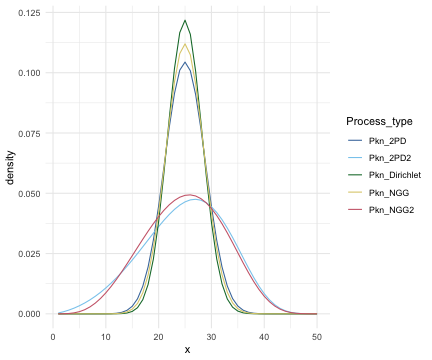

RObject{VecSxp}


In [4]:
using DataFrames, DataFramesMeta, RCall

R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50, 50,  48.4185, 0.25)),
                        Pkn_NGG2 = $(Pkn_NGG.(1:50, 50,  1., 0.7353)),
                        Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                        Pkn_2PD = $(Pkn_2PD.(1:50, 50,  12.2157, 0.25)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:50, 50,  1., 0.73001))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"


# Plots for full approximation

In [30]:
function approximation_df(β,σ,N)
    df= DataFrame(Pkn_exact = Pkn_NGG_raw.(1:N, N, β, σ),
                  Pkn_order1 = Pkn_NGG_full_approximation(N,  β, σ, logxk1),
                  Pkn_order2 = Pkn_NGG_full_approximation(N,  β, σ, logxk))
       return df
end

function plot_draw(df,N)
               R"p = ggplot(data.frame(k = 1:$N,
                                Pkn_exact = $(df.Pkn_exact),
                                Pkn_order1 = $(df.Pkn_order1),
                                Pkn_order2 = $(df.Pkn_order2)
                            ) %>%
                    gather(Process_type, density, Pkn_exact:Pkn_order2),
               aes(x=k, y = density, colour = Process_type)) +
                geom_line() +  ggtitle(TeX(sprintf('$\\beta =%2.1f, \\sigma = %.1f$',$β,$σ)))+
               ggthemes::scale_colour_ptol() + theme_minimal()+
               theme(plot.title = element_text(hjust = 0.5))"
    return R"p"
end


plot_draw (generic function with 2 methods)

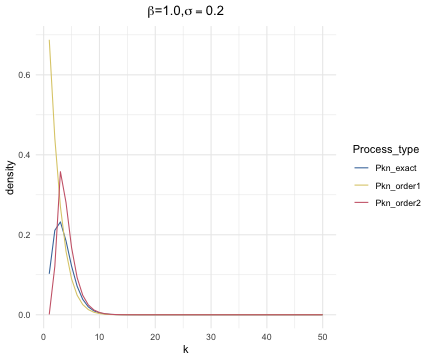

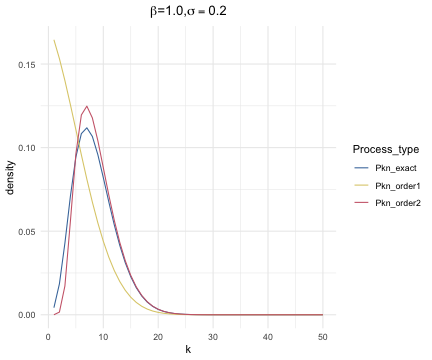

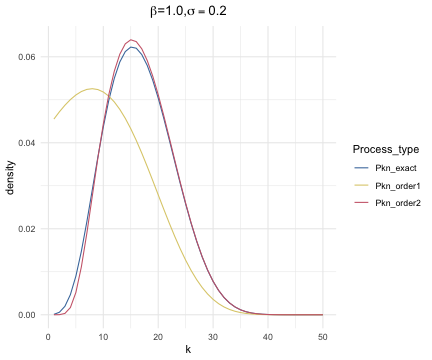

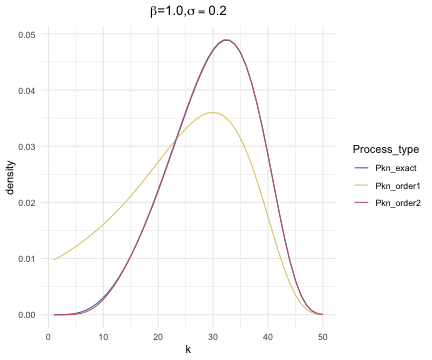

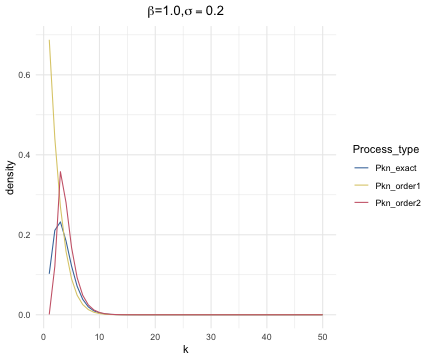

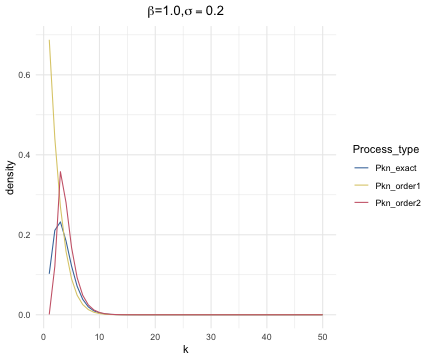

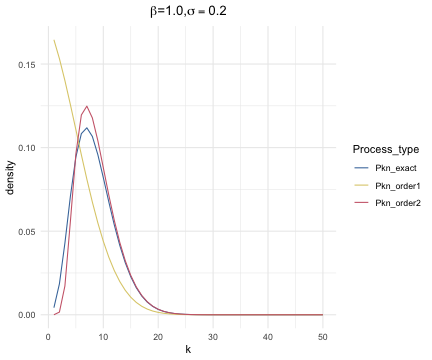

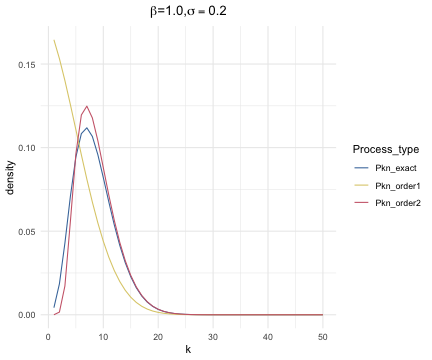

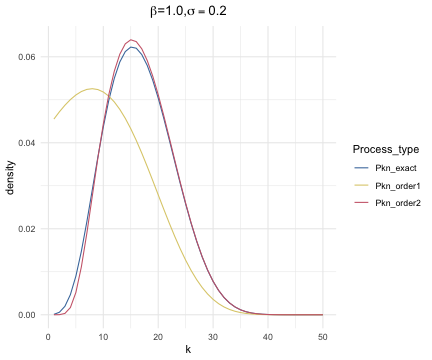

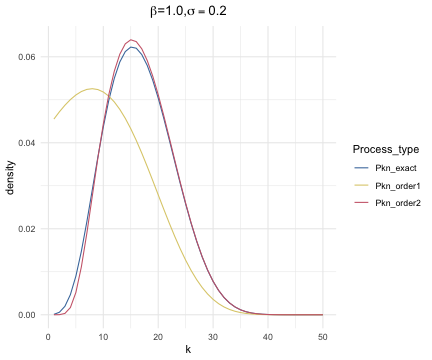

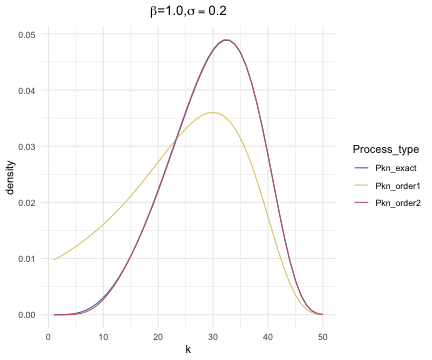

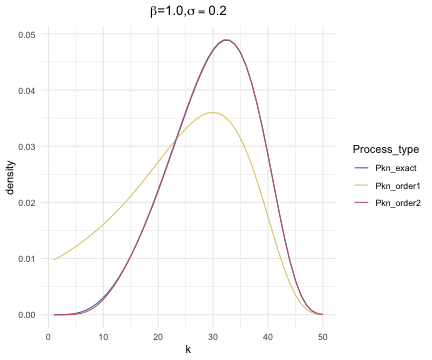

4-element Array{RObject{VecSxp},1}:
 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}


In [31]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_50 = map(x ->approximation_df(1.0,x,50),σ_vec)
P_50 = map(x ->plot_draw(x,50),DF_50)

┌ Warning: RCall.jl: 
│ Присоединяю пакет: ‘gridExtra’
│ 
│ Следующий объект скрыт от ‘package:dplyr’:
│ 
│     combine
│ 
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113
┌ Warning: RCall.jl: 
│ Присоединяю пакет: ‘cowplot’
│ 
│ Следующий объект скрыт от ‘package:ggplot2’:
│ 
│     ggsave
│ 
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113
┌ Warning: RCall.jl: Saving 6 x 5 in image
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


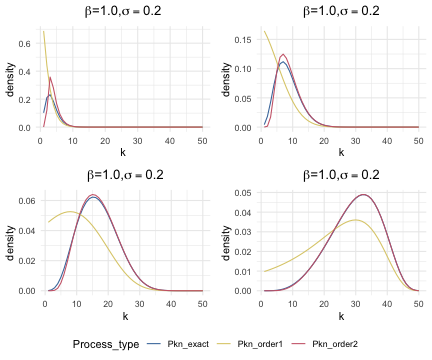

RObject{VecSxp}


In [29]:
R"library(gridExtra)
library(cowplot)
m=as.list($P_50)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
ggsave(file = 'Plots_sigma_full_approximation_50_exp.pdf',p)
p"

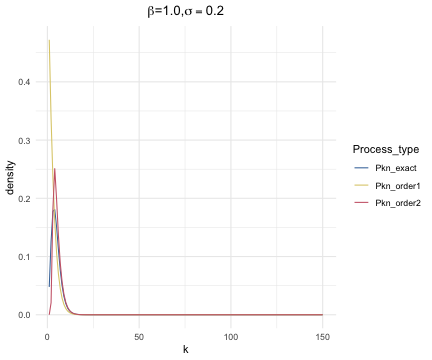

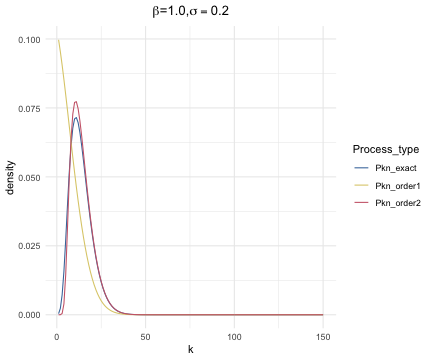

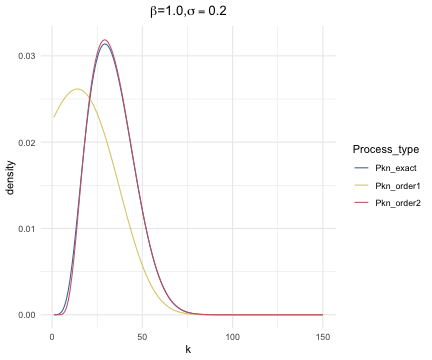

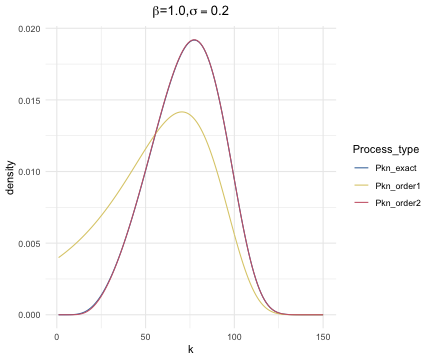

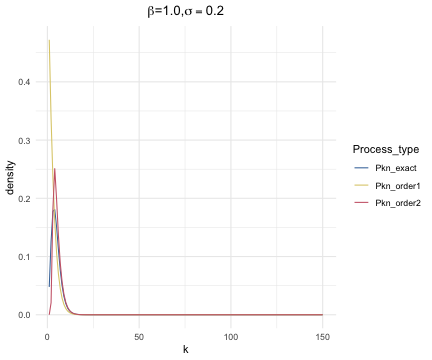

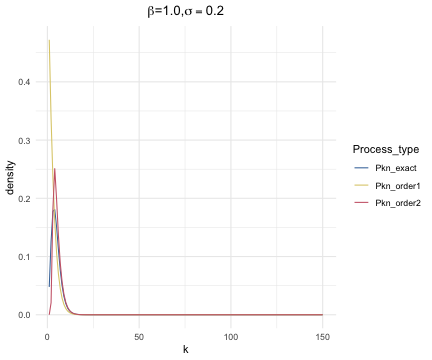

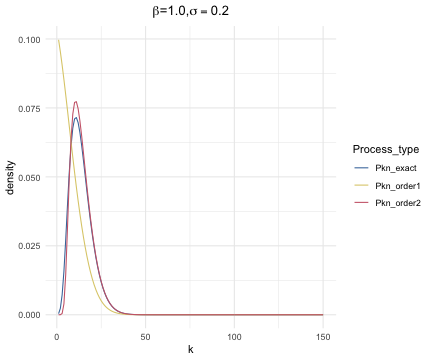

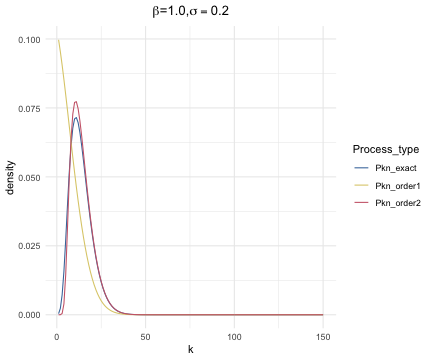

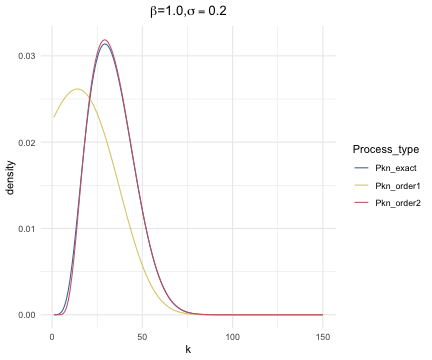

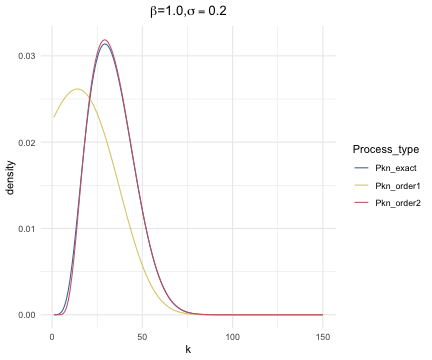

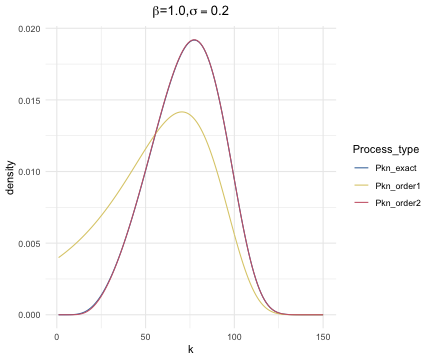

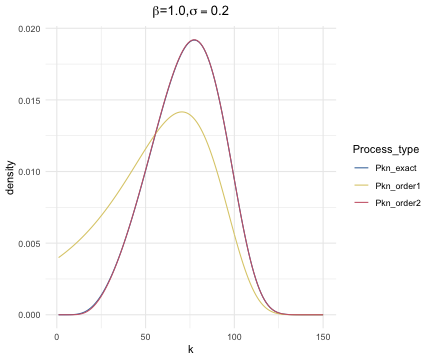

4-element Array{RObject{VecSxp},1}:
 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}


In [32]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_150 = map(x ->approximation_df(1.0,x,150),σ_vec)
P_150 = map(x ->plot_draw(x,150),DF_150)

┌ Warning: RCall.jl: Saving 6 x 5 in image
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


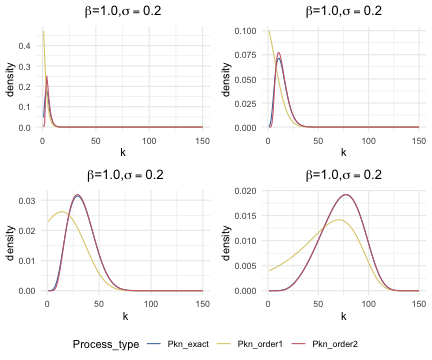

RObject{VecSxp}


In [33]:
R"library(gridExtra)
library(cowplot)
m=as.list($P_150)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
ggsave(file = 'Plots_sigma_full_approximation_150_exp.pdf',p)
p"

In [ ]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_1000 = map(x ->approximation_df(1.0,x,1000),σ_vec)
P_1000 = map(x ->plot_draw(x,1000),DF_1000)

In [ ]:
R"library(gridExtra)
library(cowplot)
m=as.list($P_1000)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
ggsave(file = 'Plots_sigma_full_approximation_1000_exp.pdf',p)
p"

# Approximation using exact $p_n$

In [35]:
function approximation_partial_df(β,σ,N)
    df= DataFrame(Pkn_exact = Pkn_NGG_raw.(1:N, N, β, σ),
                  Pkn_order1 = Pkn_NGG_approx.(1:N, N,   β, σ,logxk1 ),
                  Pkn_order2 = Pkn_NGG_approx.(1:N, N,   β, σ,logxk ))
       return df
end


approximation_partial_df (generic function with 1 method)

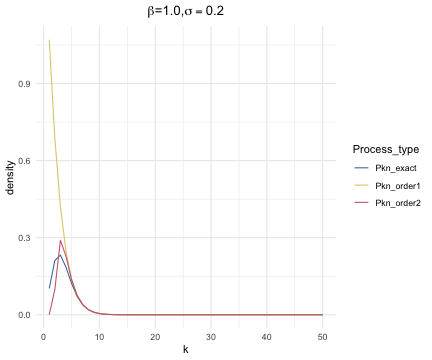

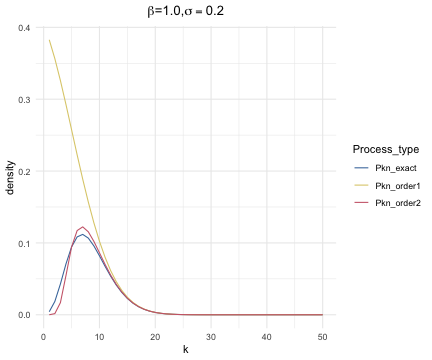

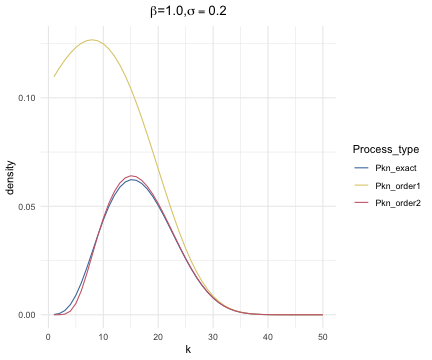

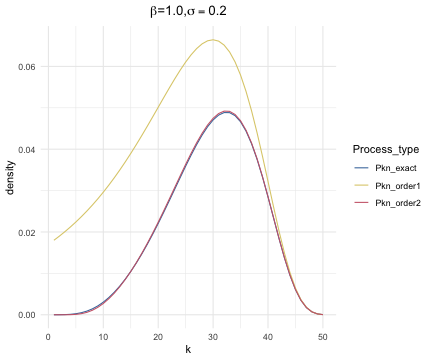

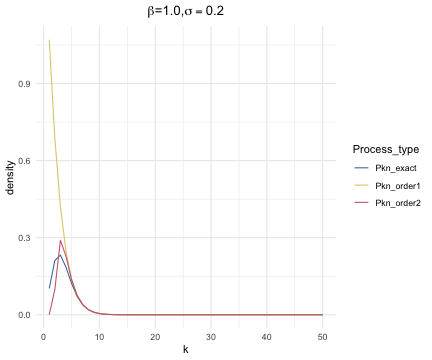

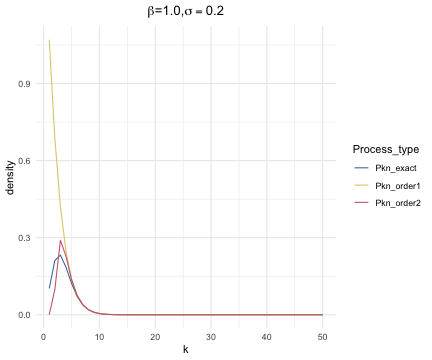

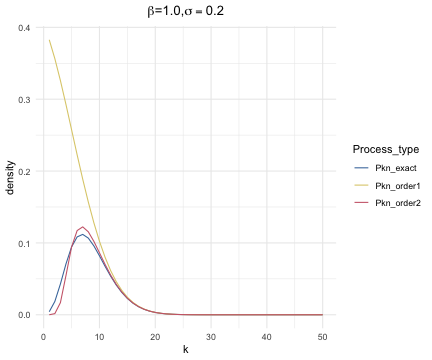

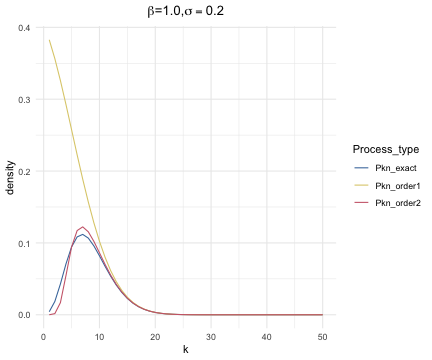

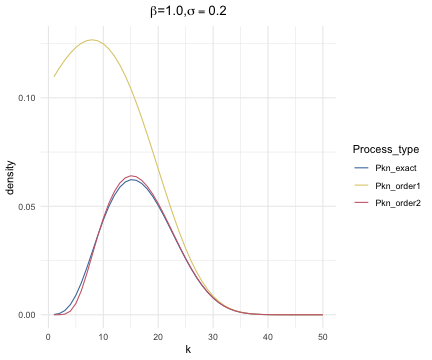

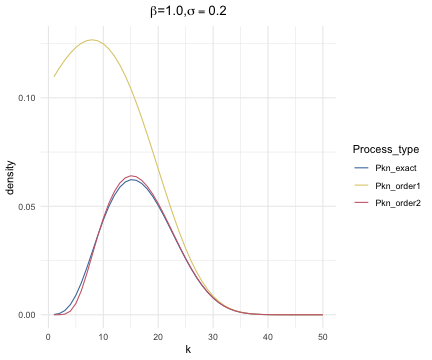

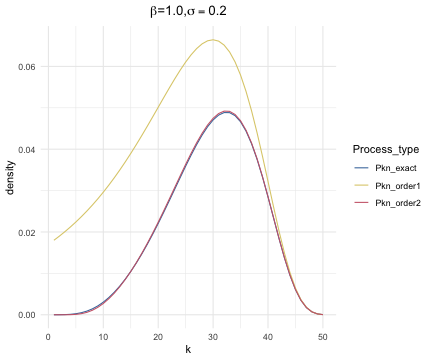

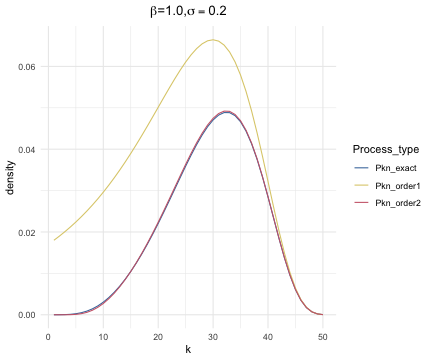

4-element Array{RObject{VecSxp},1}:
 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}


In [36]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_50 = map(x ->approximation_partial_df(1.0,x,50),σ_vec)
P_50 = map(x ->plot_draw(x,50),DF_50)

┌ Warning: RCall.jl: Saving 6 x 5 in image
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


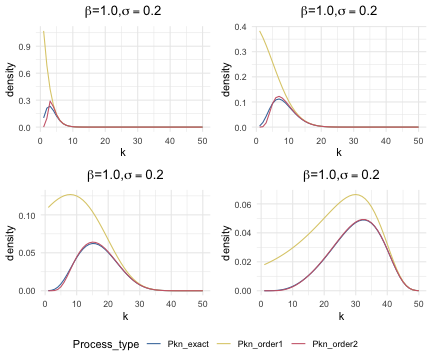

RObject{VecSxp}


In [40]:
R"library(gridExtra)
library(cowplot)
m=as.list($P_50)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
ggsave(file = 'Plots_sigma_part_approximation_50.pdf',p)
p"

┌ Warning: RCall.jl: Saving 6 x 5 in image
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


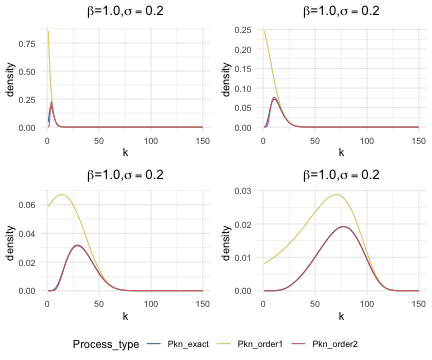

RObject{VecSxp}


In [41]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_150 = map(x ->approximation_partial_df(1.0,x,150),σ_vec)
P_150 = map(x ->plot_draw(x,150),DF_150)
R"library(gridExtra)
library(cowplot)
m=as.list($P_150)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
ggsave(file = 'Plots_sigma_part_approximation_150.pdf',p)
p"

In [42]:
using BenchmarkTools

In [43]:
@btime Pkn_NGG_raw.(1:10, 1000, 1.0,0.2)

InterruptException: InterruptException:

In [36]:
@btime Pkn_NGG_approx.(1:100, 100,  1.0,0.2,logxk )

  49.246 s (93343668 allocations: 18.72 GiB)


100-element Array{Float64,1}:
 0.00010593913236138153
 0.03653002564276386   
 0.2151627366934121    
 0.23589415128455787   
 0.167745126037952     
 0.10704931244399427   
 0.06535346564743381   
 0.03875711852233287   
 0.022435255323778183  
 0.012702204424628617  
 0.007041423378238053  
 0.003824506984624043  
 0.0020363114823548816 
 ⋮                     
 8.802403112747876e-52 
 4.846958249579393e-53 
 2.4257262125633834e-54
 1.0923605167952722e-55
 4.3717846434283835e-57
 1.5307080616515417e-58
 4.593286552890673e-60 
 1.1484953089135411e-61
 2.2971636000379263e-63
 3.4458315479139325e-65
 3.445831549858879e-67 
 1.7229157758444437e-69

In [33]:
@btime Pkn_NGG_full_approximation(100,  1.0,0.2,logxk )

  252.970 ms (968752 allocations: 71.06 MiB)


100-element Array{Float64,1}:
 0.00012026698730769047
 0.04147056930144746   
 0.24426265862478963   
 0.26779791627631155   
 0.1904320008522885    
 0.12152731492156385   
 0.07419226727968464   
 0.0439988678169242    
 0.025469536205614804  
 0.014420128089262914  
 0.007993748458972062  
 0.004341756655217098  
 0.0023117146775137624 
 ⋮                     
 9.992893842350687e-52 
 5.50249047060884e-53  
 2.75379623294555e-54  
 1.2400980211985377e-55
 4.9630514853529516e-57
 1.7377303638323354e-58
 5.214510665168184e-60 
 1.303824825267293e-61 
 2.6078460279155623e-63
 3.911866840892447e-65 
 3.911866843100439e-67 
 1.9559334225889746e-69

# Plot for different priors

In [44]:
Pkn_PYM.(1:30,50,30,1.0,0.1)

30-element Array{Float64,1}:
 0.001455982216987667  
 0.006319605141617002  
 0.013607791704451692  
 0.01932245739348987   
 0.020279801058298148  
 0.016713678827004405  
 0.011219792814180665  
 0.006282746405450831  
 0.0029825458009688378 
 0.0012138196786981783 
 0.0004267807164968345 
 0.00013031385686936754
 3.466663504976308e-5  
 ⋮                     
 6.805651793678766e-10 
 6.725427248892087e-11 
 5.660405497381701e-12 
 4.018181008799846e-13 
 2.3757258404974544e-14
 1.1499319170827145e-15
 4.4395260969148995e-17
 1.3078661948348541e-18
 2.7154113511704816e-20
 3.447493763310236e-22 
 2.0609865282849523e-24
 3.1658896738162313e-27

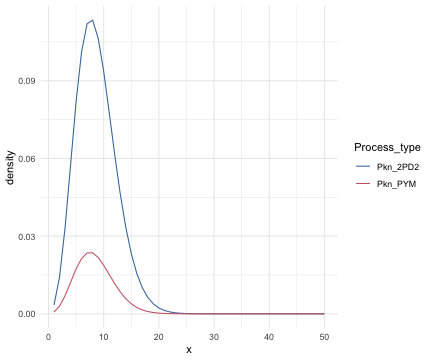

RObject{VecSxp}


In [61]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_PYM = $(Pkn_PYM.(1:50,100,150,1.0,0.2)),
                        #Pkn_PYM2 = $(Pkn_PYM.(1:50,100,150,1.0,0.2)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:50, 100, 1.0, 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

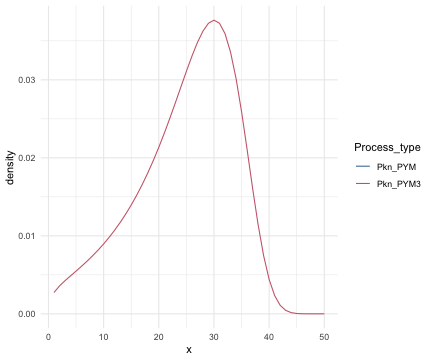

RObject{VecSxp}


┌ Warning: RCall.jl: Предупреждение: Removed 50 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


In [65]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_PYM = $(Pkn_PYM.(1:50,100,50,18.22,0.0)),
                        #Pkn_PYM2 = $(Pkn_PYM.(1:50,100,50,1.0,0.2)),
                        Pkn_PYM3 = $(Pkn_PYM.(1:50, 100,50, 0.18, 0.75))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_PYM3),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

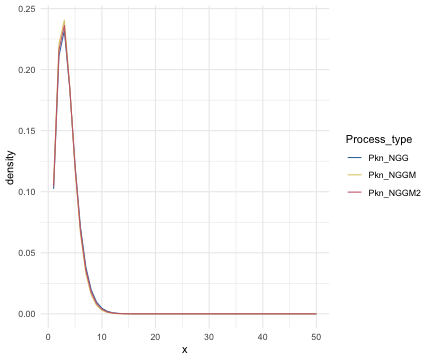

RObject{VecSxp}


In [67]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50,50,1.0,0.2)),
                        Pkn_NGGM = $(Pkn_NGGM.(1:50,50,50,1.0,0.2)),
                        Pkn_NGGM2 = $(Pkn_NGGM.(1:50,50,100,1.0,0.2))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_NGGM2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

In [ ]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50, 100,  0.5, 0.5)),
                        Pkn_NGG2 = $(Pkn_NGG.(1:50, 100,  0.5, 0.5)),
                        Pkn_PYM2 = $(Pkn_PYM.(1:50,100,70,1.0,0.2)),
                        Pkn_PYM3 = $(Pkn_PYM.(1:50,100,100,1.0,0.2)),
                        #Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                        #Pkn_2PD = $(Pkn_2PD.(1:50, 50,  12.2157, 0.25)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:50, 100,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

In [ ]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:250,
                        #Pkn_NGG = $(Pkn_NGG.(1:250, 250,  48.4185, 0.25)),
                        Pkn_PYM = $(Pkn_PYM.(1:250,250,250,1.0,0.2)),
                        Pkn_Dirichlet = $(Pkn_Dirichlet.(1:250, 250,  19.233)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:250, 250,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

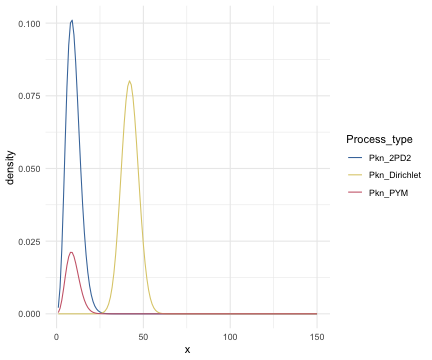

RObject{VecSxp}


In [86]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:150,
                        #Pkn_NGG = $(Pkn_NGG.(1:150, 150,  48.4185, 0.25)),
                        Pkn_PYM = $(Pkn_PYM.(1:150,150,150,1.0,0.2)),

                        Pkn_Dirichlet = $(Pkn_Dirichlet.(1:150, 150,  19.233)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:150, 150,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

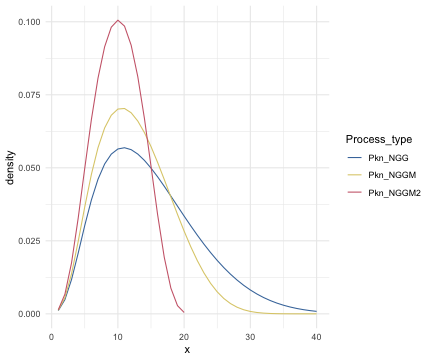

RObject{VecSxp}


┌ Warning: RCall.jl: Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


In [80]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:40,
                        Pkn_NGG = $(Pkn_NGG.(1:40, 100, 0.5,0.5)),
                        Pkn_NGGM = $(Pkn_NGGM.(1:40,100,50,0.5,0.5)),
                        Pkn_NGGM2 = $(Pkn_NGGM.(1:40,100,20,0.5,0.5))
                       # Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                     #   Pkn_2PD2 = $(Pkn_2PD.(1:50, 50,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_NGGM2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"


┌ Warning: RCall.jl: Saving 7 x 7 in image
│ Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


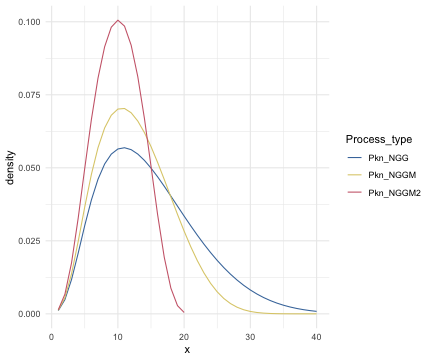

RObject{VecSxp}


┌ Warning: RCall.jl: Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


In [81]:
R"ggsave(file = 'Plots_NGG_NGGM.pdf',p)
p"

In [75]:
Pkn_NGG.(1:50, 50, 1.0,0.2)

50-element Array{Float64,1}:
 0.10237420796347492   
 0.21114850123876583   
 0.2321706420409591    
 0.1849351741940169    
 0.12180381116821934   
 0.07128531936556325   
 0.03860881401628918   
 0.019781528451267776  
 0.009694911868060237  
 0.0045691888149501075 
 0.0020758824538033623 
 0.0009101386950149474 
 0.0003852558078898733 
 ⋮                     
 3.767515999385846e-20 
 4.164341137149641e-21 
 4.1803146383984203e-22
 3.773397381551568e-23 
 3.0253424205811356e-24
 2.1210285235328884e-25
 1.2739228618522805e-26
 6.373501425903838e-28 
 2.550171912087254e-29 
 7.651281106820145e-31 
 1.5302562637966226e-32
 1.5302563010333905e-34

In [76]:
Pkn_NGGM.(1:50,50,50,1.0,0.2)

50-element Array{Float64,1}:
 0.1066915454456795    
 0.22109930550445658   
 0.24050060734915865   
 0.18683094021870547   
 0.11840303779267333   
 0.06577666825247623   
 0.03332462311533393   
 0.015713615301315775  
 0.0069607787751738755 
 0.0029072254209340457 
 0.001145833412233498  
 0.000426015782877396  
 0.0001492705017598672 
 ⋮                     
 8.10079578707421e-29  
 1.8143827535069905e-30
 3.3136862029145693e-32
 4.835745943368231e-34 
 5.499422186717024e-36 
 4.721925713770558e-38 
 2.936904646118505e-40 
 1.2505294425217611e-42
 3.359010653423911e-45 
 5.001797688973724e-48 
 3.2619566066975444e-51
 5.24009103687212e-55  

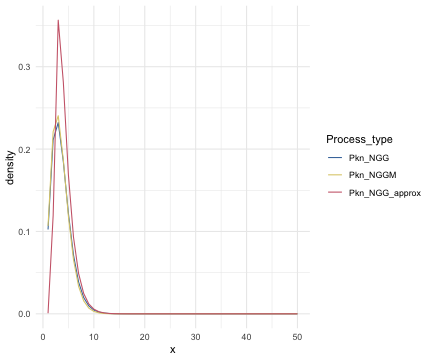

RObject{VecSxp}


In [92]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50, 50, 1.0,0.2)),
                        Pkn_NGGM = $(Pkn_NGGM.(1:50,50,50,1.0,0.2)),
                       # Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                        Pkn_NGG_approx = $(Pkn_NGG_full_approximation(50, 1.0,0.2, logxk))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_NGG_approx),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

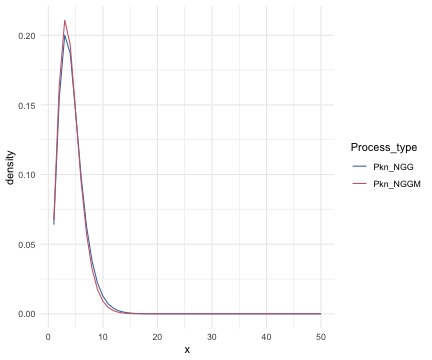

RObject{VecSxp}


In [94]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50, 100, 1.0,0.2)),
                        Pkn_NGGM = $(Pkn_NGGM.(1:50,100,50,1.0,0.2))
                       # Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                     #   Pkn_NGG_approx = $(Pkn_NGG_full_approximation(50, 1.0,0.2, logxk))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_NGGM),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

In [68]:
import Nemo.fac
gamma(x::Int64) = Nemo.gamma(RR(x))




fac (generic function with 4 methods)

In [71]:
gamma(4)

6.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [72]:
gamma(1+2)

2.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [74]:
unsigned_Stirling2(15,10)

12662650